(ref:lec5:ex1_sol)=
# Solutions of Exercise 5.1

Consider the control system in {numref}`fig:lec:ex1_sol:block`, where $v(t)$ is a sinusoidal disturbance $v(t) = \sin(\omega t)$.

```{figure} res/ex1-block.svg
---
width: 750px
name: fig:lec:ex1_sol:block
---
Block diagram of the control system
```

The proportional controller has a positive gain, that is, $K > 0$.

1. Compute, as a function of $K$, the absolute value of the sensitivity function at $\omega = 1$ rad/s.
2. Determine for what values of $K$ the disturbance $v(t)$ gets attenuated[^attenuation] by a factor of $9$ at the frequency $\omega= 1$ rad/s.

If necessary, use the asymptotic Bode plot of $G(s)$ shown in {numref}`fig:lec5:ex1_sol:bode`.


In [1]:
set(groot, 'defaultLineLineWidth', 2);

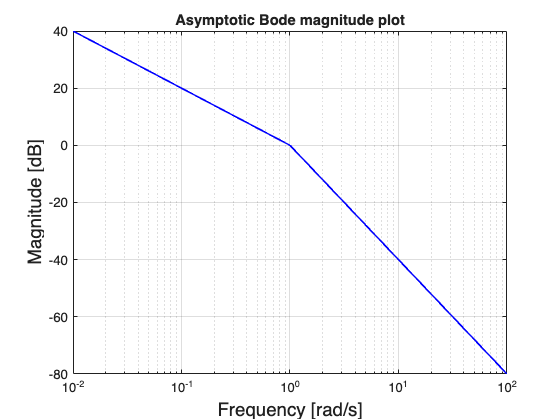

In [2]:
G = tf(1, [1, 1, 0]);
if ~exist('asymptotic_bodemag')
    urlwrite('https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/matlab/asymptotic_bodemag.m', 'asymptotic_bodemag.m');
end

asymptotic_bodemag(G); 

---

## Solution

### Question 1

From Lecture 7, we know that the sensitivity function $S(s)$ is the transfer function between $V(s)$ and $Y(s)$:

$$
S(s) \equiv \frac{Y(s)}{V(s)} = \frac{1}{1 + G_o(s)} = \frac{1}{1 + K \frac{1}{s^2 + s}} = \frac{s^2 + s}{s^2 + s + K}
$$

Note that $S(s)$ is stable for any $K>0$ (Routh-Hurwitz criterion).

We can now compute its modulus (absolute value) at $\omega = 1$ rad/s

$$
\lvert S(i \omega) \lvert = \left\lvert\frac{ (i \omega)^2 + i \omega}{(i \omega)^2 + i \omega  + K} \right\lvert
$$

Knowing that $i^2 = -1$ and that $\omega = 1$ rad/s, we get

$$
\lvert S(i \omega) \lvert = \left\lvert \frac{ -1 + i }{K - 1 + i } \right\lvert
$$

We now multiply and divide the denominator by $(K - 1) - i$, to make the denominator real

$$
\lvert S(i \omega) \lvert = \left\lvert \frac{-1 + i }{(K - 1 + i) \cdot \frac{K - 1 - i}{K - 1 - i}} \right\lvert  = \left\lvert  \frac{ (-1 + i)(K - 1 - i)}{ (K-1)^2 - i^2  } \right\lvert = \left\lvert \frac{-K + 1 + i+ i K - i - i^2}{K^2 - 2K + 1 + 1} \right\lvert
$$



Let's now isolate the real part of the numerator from the imaginary part

$$
\lvert S(i \omega) \lvert  = \left\lvert \frac{-K + 2 + i K }{K^2 - 2K + 2} \right\lvert = \left\lvert \underbrace{\frac{-K + 2}{K^2 - 2K + 2}}_{\text{Real}} + i  \underbrace{\frac{K}{K^2 - 2K + 2}}_{\text{Imaginary}} \right\lvert
$$ 

The modulus of this complex number is given by the square-root of the real part squared plus the imaginary part squared:

$$
\lvert S(i \omega) \lvert  = \sqrt{\left(\frac{-K + 2}{K^2 - 2K + 2}\right)^2 + \left(\frac{K}{K^2 - 2K + 2} \right)^2} = \sqrt{\frac{(-K+2)^2 + K^2}{(K^2 - 2K + 2)^2}} = \sqrt{\frac{2\cancel{(K^2 - 2K + 2)}}{(K^2 - 2K + 2)^{\cancel{2}}}} = \sqrt{\frac{2}{\lvert K^2 - 2K + 2 \lvert}}
$$ 

We further notice that $K^2 - 2K + 2 = (K-1)^2 + 1$ which is **always positive** (it's the sum of two squares). The expression of $\lvert S(i \omega) \lvert$ becomes 

$$
\lvert S(i \omega) \lvert = \sqrt{ \frac{2}{(K-1)^2 + 1}}
$$ (eq:lec5:ex1:sensitivity_mag)

### Question 2

Since $S(s)$, the Frequency Response Theorem tells us that $\lvert Y(i \omega)\lvert = \lvert S(i \omega) \lvert \cdot \lvert V(i \omega) \lvert$ where, in our case, $\omega = 1$. The attenuation factor of $4$ is achieved if

$$
\lvert S(i 1) \lvert \leq \frac{1}{9}
$$

From {eq}`eq:lec5:ex1:sensitivity_mag`, we can write

$$
\sqrt{\frac{2}{(K-1)^2 + 1}} \leq \frac{1}{9} = \frac{1}{\sqrt{81}}
$$

This is achieved if the denominator is at least $81$ times larger than the numerator:

$$
(K-1)^2 + 1  \geq 81 \cdot 2
$$

Moving the term $+1$ on the right hand side, we conclude that the inequality is solved by $(K-1)^2 \geq 161$, i.e., $K - 1 \leq -\sqrt{161} \cup K - 1 \geq \sqrt{161}$. 

The first interval, $K \leq 1 - \sqrt{161} < 0$ needs to be discarded because $K > 0$. The set of $K$ that satisfy the disturbance attenuation requirement is therefore

$$
\boxed{K \geq 1 + \sqrt{161} \approx 14}
$$

### Alternative solution via Bode plots

The problem could have been solved very easily with Bode plots. Even though approximate, this solution is the suggested one.

We start by noting that  $G_o(s) = G(s)$ for $K=1$. For this specific $K$, we can sketch the sensitivity function's magnitude plot according to:

$$
\lvert S(i \omega) \lvert_{\text{dB}} \approx \begin{dcases}
- \lvert G_o (i \omega) \lvert_{\text{dB}} & \text{where } \lvert G_o (i \omega) \lvert_{\text{dB}} < 0\text{dB} \\
0 ~\text{dB} & \text{where } \lvert G_o (i \omega) \lvert_{\text{dB}} > 0 \text{dB}
\end{dcases}
$$ (eq:lec5:ex1:sensitivity_rule)

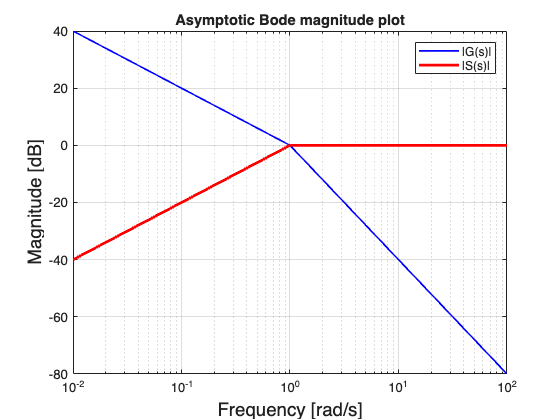

In [3]:
[w, mag] = asymptotic_bodemag(G);
hold on;
idx = find(abs(mag) <= 1e-3, 1, 'first');

% If zero is never reached, stop at the end
if isempty(idx)
    idx = length(mag);
end

% Build modified magnitude
sensitivity = zeros(size(mag));
sensitivity(1:idx) = -mag(1:idx);
plot(w, sensitivity, 'Color', 'r', 'LineWidth', 2);
legend('|G(s)|', '|S(s)|');

Clearly, for $K=1$, $\lvert S(i 1)\lvert = 0 \text{dB}$. In order to ensure an attenuation factor of $9$, we must have that $\lvert S(i 1)\lvert \leq 9$ or, in decibels, $\lvert S(i 1)\lvert_{\text{dB}} \leq -19 \text{dB}$.

To achieve this, according to {eq}`eq:lec5:ex1:sensitivity_rule`, we must find $K$ so that $\lvert G_o(i1) \lvert_{\text{dB}} > -19 \text{dB}$.
Because for $K=1$ the magnitude of the open-loop transfer function in $\omega=1$ is $\lvert G_o(i \omega)\lvert_{\text{dB}} \approx 0 \text{dB}$, $K$ must be larger than $19$ dB. That is, $K > 9$.

```{admonition} Note
:class: note

This result is quite different from that derived in the [analytical solution of Question 2](#question-2). 
The reason is that in {numref}`fig:lec5:ex1_sol:sketch_sensitivity_1` we used the asymoptotic Bode diagrams, which are **inaccurate near the open-loop poles** (which, in our case, sadly happen to be in $s=-1$, at $\omega = 1$).

Curious to see a proof? See {ref}`ref:lec5:ex1_more_details`!

This solution  is however perfectly acceptable in the context of our course.
```

---

[^attenuation]: That is, the effect of $v(t)$ on the output $y(t)$ is $\frac{1}{9}$ of the maximum amplitude of $v(t)$, in this case $1$. In this case, we say that the closed-loop achieves an attenuation factor of $9$ for disturbances at frequency $\omega = 1$.